In [7]:
%matplotlib inline

In [21]:
import math
import webdataset as wds
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice

In [3]:
ds = wds.WebDataset("gs://ocro-iaa/lin/lin-{000000..000009}.tar").decode()
for sample in ds:
    print(sample["__key__"], sample.keys())
    break

67656e65736973776869746566616d30306d616c74676f6f67/00000 dict_keys(['__key__', '__url__', 'lin.json'])


In [13]:
lin = sample["lin.json"]

In [15]:
lin

[['<eob>', None],
 ['This', '122 1107 264 1164'],
 ['is', '290 1107 340 1164'],
 ['a', '367 1125 400 1164'],
 ['digital', '424 1107 632 1181'],
 ['copy', '657 1125 813 1181'],
 ['of', '838 1107 909 1164'],
 ['a', '929 1125 962 1164'],
 ['book', '985 1107 1151 1164'],
 ['that', '1172 1108 1295 1164'],
 ['was', '1318 1125 1441 1164'],
 ['preserved', '1465 1107 1785 1181'],
 ['for', '1809 1107 1904 1164'],
 ['generations', '1927 1107 2305 1181'],
 ['on', '2331 1125 2410 1164'],
 ['library', '2435 1107 2652 1181'],
 ['shelves', '2679 1107 2915 1164'],
 ['before', '2940 1107 3148 1164'],
 ['it', '3174 1107 3218 1164'],
 ['was', '3241 1125 3364 1164'],
 ['carefully', '3390 1107 3681 1181'],
 ['scanned', '3708 1107 3970 1164'],
 ['by', '3993 1107 4073 1181'],
 ['Google', '4099 1108 4338 1181'],
 ['as', '4364 1125 4427 1164'],
 ['part', '4451 1116 4580 1181'],
 ['of', '4603 1107 4674 1164'],
 ['a', '4694 1125 4727 1164'],
 ['project', '4749 1107 4979 1181'],
 ['<br>', None],
 ['to', '121 1215 

In [46]:
def page_classifier(lin, do_plot=False, **kw):
    lin = sample["lin.json"]
    ys = []
    for text, bbox in lin:
        if bbox is None: continue
        bbox = map(int, bbox.split())
        x0, y0, x1, y1 = bbox
        ys.append(float(y1))
    if len(ys) < 10:
        return "mostly-empty"
    xs = np.linspace(0, 1, len(ys))
    ys = ndi.median_filter(ys, 5)
    ys = ndi.gaussian_filter(ys, 20.0)
    ys -= np.amin(ys)
    ys /= np.amax(ys)
    ysm = np.maximum.accumulate(ys)
    delta = ys - ysm
    single = np.all(delta > -0.1)
    if single:
        result = "single"
    elif np.mean(ys[:len(ys)//4]) > 0.5:
        result = "backwards"
    else:
        result = "multi"
    color = dict(single="green", backwards="red", multi="blue")[result]
    if do_plot:
        plt.plot(xs, ys, color=color, **kw)
    return result

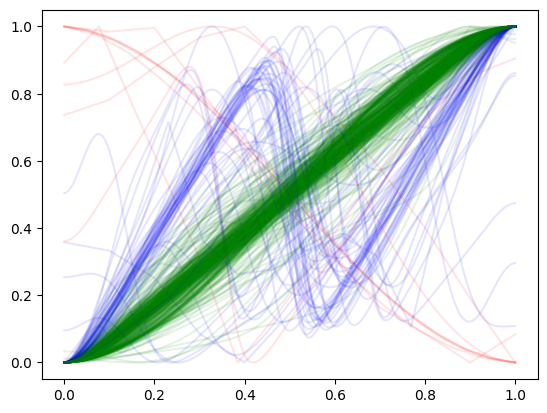

In [47]:
for sample in islice(ds, 0, 10000, 20):
    lin = sample["lin.json"]
    result = page_classifier(lin, do_plot=True, alpha=0.1)

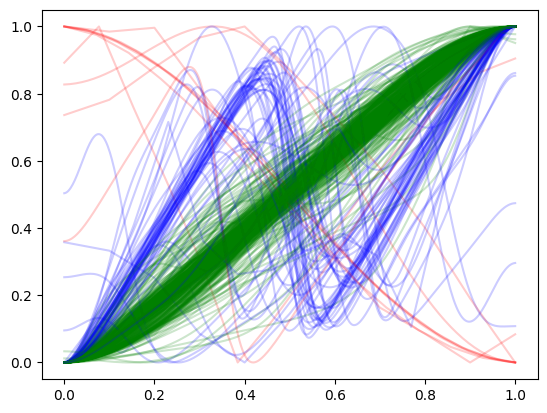

In [39]:
for sample in islice(ds, 0, 10000, 20):
    lin = sample["lin.json"]
    ys = []
    for text, bbox in lin:
        if bbox is None: continue
        bbox = map(int, bbox.split())
        x0, y0, x1, y1 = bbox
        ys.append(float(y1))
    if len(ys) < 10:
        continue
    xs = np.linspace(0, 1, len(ys))
    ys = ndi.median_filter(ys, 5)
    ys = ndi.gaussian_filter(ys, 20.0)
    ys -= np.amin(ys)
    ys /= np.amax(ys)
    ysm = np.maximum.accumulate(ys)
    delta = ys - ysm
    single = np.all(delta > -0.1)
    c = "green" if single else "blue"
    if np.mean(ys[:len(ys)//4]) > 0.5:
        c = "red"
    plt.plot(xs, ys, alpha=0.2, color=c)
